In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
file_name = '/Users/nicholassofroniew/Github/image-demos/data/benchmarks/zarr_3D_zarr_2.csv'

In [44]:
df = pd.read_csv(file_name)

In [45]:
df

,Unnamed: 0,N,c,location,move_back_time,move_in_time,move_new_time,opp_caching,refresh_time,shape
0,0,256.0,1.0,local,0.001283,0.001867,0.001820,off,0.001151,"(256, 256, 16)"
1,1,256.0,1.0,local,0.000938,0.001412,0.001455,on,0.000894,"(256, 256, 16)"
2,2,256.0,2.0,local,0.001097,0.001019,0.001912,off,0.000913,"(256, 256, 16)"
3,3,256.0,2.0,local,0.000742,0.000688,0.001330,on,0.000656,"(256, 256, 16)"
4,4,256.0,4.0,local,0.001192,0.001265,0.002221,off,0.001085,"(256, 256, 16)"
5,5,256.0,4.0,local,0.000817,0.000837,0.001607,on,0.000774,"(256, 256, 16)"
6,6,256.0,8.0,local,0.001604,0.001596,0.002873,off,0.001519,"(256, 256, 16)"
7,7,256.0,8.0,local,0.001058,0.001035,0.002204,on,0.000984,"(256, 256, 16)"
8,8,256.0,1.0,in-memory,0.000331,0.000439,0.000335,off,0.000365,"(256, 256, 16)"
9,9,512.0,1.0,local,0.001235,0.002455,0.002238,off,0.001349,"(512, 512, 16)"


### Look at refresh and move times as a function of data size

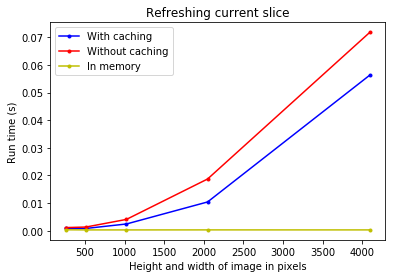

In [46]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['refresh_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['refresh_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['refresh_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Refreshing current slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

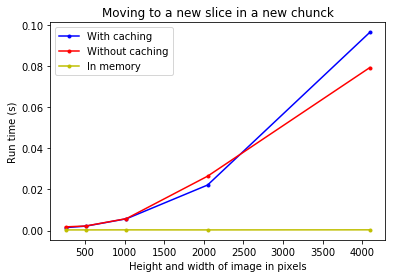

In [47]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['move_new_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['move_new_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_new_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in a new chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

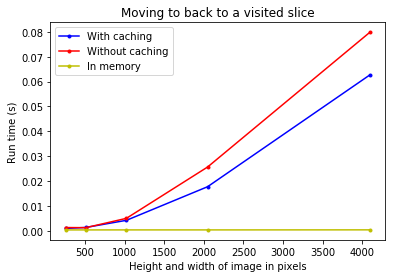

In [48]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['move_back_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['move_back_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_back_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to back to a visited slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

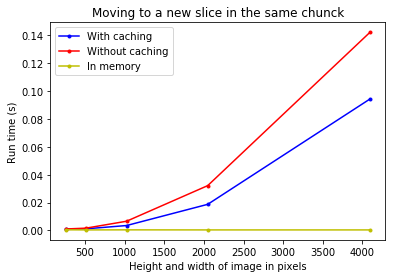

In [49]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==2]
p1 = plt.plot(df_c['N'], df_c['move_in_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==2]
p2 = plt.plot(df_c['N'], df_c['move_in_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_in_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in the same chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

### Look at effect of chunk size

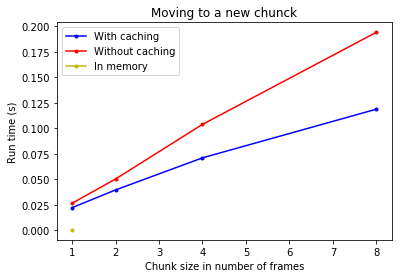

In [50]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to a new chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

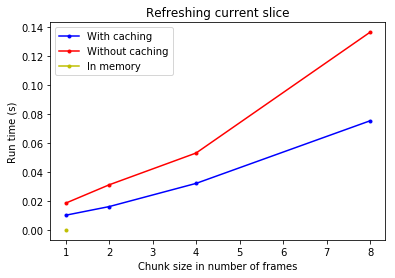

In [51]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Refreshing current slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

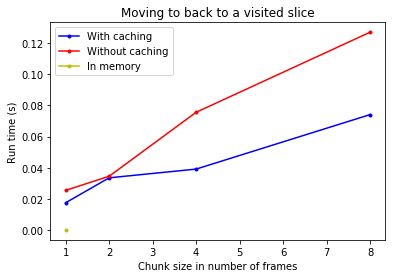

In [52]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to back to a visited slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

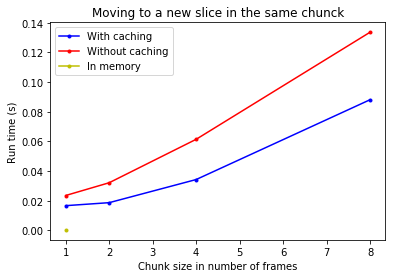

In [53]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in the same chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));